## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [1]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pathlib

path='/content/drive/MyDrive/Mask_Dataset/'
data_dir = pathlib.Path(path)

### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [6]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

8982


In [7]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['without_mask', 'mask_weared_incorrect', 'with_mask']


[2994, 2994, 2994]


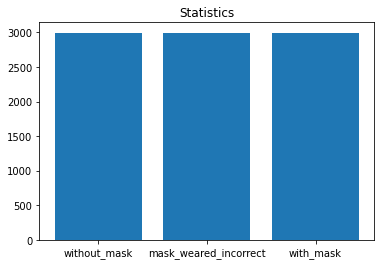

In [8]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

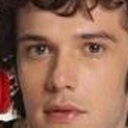

without_mask


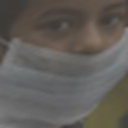

mask_weared_incorrect


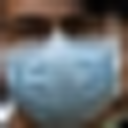

with_mask


In [48]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow

# Your code
for label in output_classes:
         this_path=path+label
         dir=pathlib.Path(this_path)
         img_count=os.listdir(dir)
         img_path = this_path + '/' + img_count[1]
         img = cv2.imread(img_path)
         cv2_imshow(img)
         print(label)

In [31]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model
image_shape = img.shape
print(image_shape)

(128, 128, 3)


In [26]:
# Check if all the images have same shape, else you need to resize them to some common size
# The code provided as it is above in the template will help 
combined_images_shape = []
dict
for label in output_classes:
    this_path=path+label
    dir=pathlib.Path(this_path)
    img_count = os.listdir(dir)

    for i in img_count:
        img_path = this_path + '/' + i
        img = cv2.imread(img_path)
        combined_images_shape.append(img.shape)

print(combined_images_shape)
print(len(combined_images_shape))

[(128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128

In [28]:
# If the shape is variable, reshape to a common size 
# If it is same, prove it
from collections import Counter
items = Counter(combined_images_shape).keys()
if len(items)==1:
   print(f"The size of all the images is  : {items}")
else:
   print("The size of all the images are not same")

The size of all the images is  : dict_keys([(128, 128, 3)])


In [ ]:
# Anything else you want to plot/experiment

### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [29]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential

In [50]:
# Choose and define base model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
base_model = VGG16(input_shape=image_shape, weights='imagenet', include_top=False)

In [51]:
# Print base model summary and have a look at the layers
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [61]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)
for layer in base_model.layers:
  layer.trainable = False

In [56]:
# Append Fully connected/custom Conv2D/Dropout/MaxPooling layers to the base model
flatten = Flatten()(base_model.output)
dense_1 = Dense(500, activation='relu')(flatten)
dense_2 = Dense(500, activation='relu')(dense_1)
dense_3 = Dense(100, activation='relu')(dense_2)
dense_4 = Dense(100, activation='relu')(dense_3)

In [58]:
# Add the final output layer
dense_output = Dense(3, activation='softmax')(dense_4)
model = Model(inputs=base_model.input, outputs=dense_output)

In [59]:
# Print your model's summary
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [63]:
# Compile you model (set the parameters like loss/optimizers/metrics)
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = "accuracy")

### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

In [64]:
from keras.applications.vgg16 import preprocess_input # Change according to your base model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Your code 
training_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range = 0.2)
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Anything else you wish to try

### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [65]:
# Your code
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_dataset = image_generator.flow_from_directory(batch_size=3,directory=path,target_size=(128, 128),subset="training",class_mode='categorical')
validation_dataset = image_generator.flow_from_directory(batch_size=32, directory=path,target_size=(128,128),subset="validation", class_mode='categorical')

Found 7188 images belonging to 3 classes.
Found 1794 images belonging to 3 classes.


### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [66]:
from keras.callbacks import ModelCheckpoint
# ModelCheckpoint is helpful to save the model giving best results (brownie points)
history = model.fit(train_dataset,validation_data=validation_dataset,epochs=20,steps_per_epoch=len(train_dataset),validation_steps=len(validation_dataset))

Epoch 1/20
2396/2396 [==============================] - 36s 15ms/step - loss: 0.2456 - accuracy: 0.9128 - val_loss: 0.0906 - val_accuracy: 0.9710
Epoch 2/20
2396/2396 [==============================] - 34s 14ms/step - loss: 0.1103 - accuracy: 0.9652 - val_loss: 0.0801 - val_accuracy: 0.9732
Epoch 3/20
2396/2396 [==============================] - 35s 15ms/step - loss: 0.0624 - accuracy: 0.9808 - val_loss: 0.1103 - val_accuracy: 0.9666
Epoch 4/20
2396/2396 [==============================] - 32s 14ms/step - loss: 0.0479 - accuracy: 0.9868 - val_loss: 0.3241 - val_accuracy: 0.9370
Epoch 5/20
2396/2396 [==============================] - 33s 14ms/step - loss: 0.0479 - accuracy: 0.9850 - val_loss: 0.1118 - val_accuracy: 0.9671
Epoch 6/20
2396/2396 [==============================] - 34s 14ms/step - loss: 0.0534 - accuracy: 0.9885 - val_loss: 0.0858 - val_accuracy: 0.9749
Epoch 7/20
2396/2396 [==============================] - 32s 13ms/step - loss: 0.0279 - accuracy: 0.9925 - val_loss: 0.0856 -

### Evaluate the performance

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


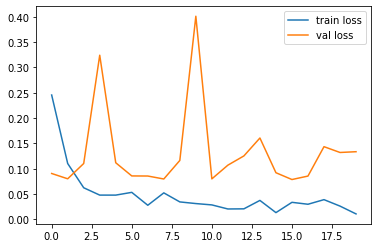

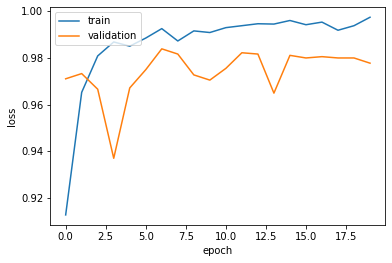

In [67]:
# Plot training & validation loss/accuracy values
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
# print classification report
validation_classes = []
validation_images = []
for i in range( -(-validation_dataset.samples // validation_dataset.batch_size)):
        batch = validation_dataset.next()
        expected = np.argmax(batch[1], axis=1)
        validation_classes.extend(expected)
        validation_images.extend(batch[0])
validation_classes = np.array(validation_classes)
validation_images = np.array(validation_images)
Y_pred = model.predict(validation_images)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(validation_classes, y_pred,target_names = ['without_mask', 'mask_weared_incorrect', 'with_mask']))

                       precision    recall  f1-score   support

         without_mask       0.98      1.00      0.99       598
mask_weared_incorrect       0.97      0.97      0.97       598
            with_mask       0.99      0.96      0.98       598

             accuracy                           0.98      1794
            macro avg       0.98      0.98      0.98      1794
         weighted avg       0.98      0.98      0.98      1794



In [ ]:
# Use the classification report to print precision, recall, f1-score for the three classes(optional, brownie points)